In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
path = 'C:\\Users\\chris\\Documents\\pandas_deep_dive\\data\\'
titles = pd.read_csv(path+'titles.csv')
cast = pd.read_csv(path+'cast.csv')
release_dates = pd.read_csv(path + 'release_dates.csv')

In [3]:
h1 = titles.head()
h2 = cast.head()

In [4]:
# access the "series" in a dataframe
h1.year # same as: h1['year']
h1[(h1.year > 1980) | (h1.year  < 1970)]
# you have to use h1.year and not year, because we're creating an array of t/f

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
# subset data
titles[titles.title  == 'Macbeth'].head(4)

,title,year
4162,Macbeth,1913
11539,Macbeth,2013
16930,Macbeth,1997
25430,Macbeth,1998


In [6]:
# for series use sort_values
titles.year.sort_values(ascending=True).head(4)

176477    1894
213694    1898
123627    1899
182202    1900
Name: year, dtype: int64

In [7]:
# remove nulls
cast[cast.n.notnull()].head(4)

,title,year,name,type,character,n
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0


In [8]:
"Hamlet".startswith('Hamlet')
# in a data fram we have to use .str.
titles[titles.title.str.startswith("Hamlet")].head(4)

,title,year
5969,Hamlet,1948
7598,Hamlet: Prince of Denmark,1989
8511,Hamlet (II),2005
8794,Hamlet (II),2015


In [9]:
# use contains
titles[titles.title.str.contains("Batman")].head(4)

,title,year
7310,"Fight! Batman, Fight!",1973
14078,The Lego Batman Movie,2017
23950,Batman: The Movie,1966
26908,Batman Untold,2010


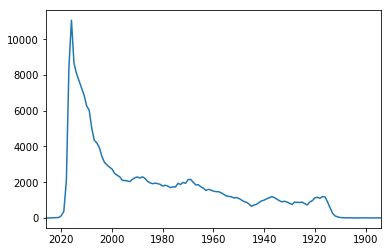

In [10]:
#value_counts, similar to table
h = titles.year.value_counts()
# notice that series is not sorted by year, and instead the frequency.
# the index needs to be sorted. 
h = h.sort_index(ascending=False)
h.plot()

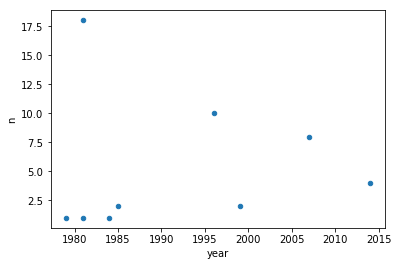

In [11]:
# more plotting
c = cast
c = cast[cast.character == 'Kermit the Frog']
c.plot(x = 'year', y = 'n', kind = 'scatter')

In [12]:
# Columns vs Series
t = titles.head(10)
t = t[['year']] # select the column
t + 20

,year
0,2010
1,1989
2,2013
3,2020
4,2031
5,2035
6,2028
7,1990
8,2036
9,2028


In [13]:
# Columns vs Series
t = titles.head(10)
t = t.year # select the column
t + 20

0    2010
1    1989
2    2013
3    2020
4    2031
5    2035
6    2028
7    1990
8    2036
9    2028
Name: year, dtype: int64

In [14]:
%%time
cast[cast.title == 'Sleuth'].head()

Wall time: 494 ms


,title,year,name,type,character,n
250297,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
314691,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
314692,Sleuth,2007,Michael Caine,actor,Andrew,1.0
360365,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
360366,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN


In [15]:
%%time
# set a new index 
c = cast
c = c.set_index(['title']).sort_index()
# if you sort index, it'll be faster! when you pull data -- 
#great for apps with repeated queries

Wall time: 14.9 s


In [16]:
%%time
# way faster! nanosec
c.loc['Batman']

Wall time: 1.57 s


,year,name,type,character,n
title,,,,,
Batman,1989,Hugo Blick,actor,Young Jack Napier,41.0
Batman,1943,Blackie Whiteford,actor,Barfly,NaN
Batman,1989,Elliott (II) Stein,actor,Man in Crowd,53.0
Batman,1943,Lewis Wilson,actor,Batman,1.0
Batman,1989,Jazzer Jeyes,actor,Napier Hood,32.0
Batman,1989,George Lane Cooper,actor,Goon,16.0
Batman,1943,Harold Miller,actor,Restaurant Patron,NaN
Batman,1989,Tracey Walter,actor,Bob the Goon,10.0
Batman,1989,Kim Basinger,actress,Vicki Vale,3.0


In [17]:
%%time
c = c.reset_index()
c = c.set_index(['title', 'year']).sort_index()

Wall time: 10.4 s


In [18]:
%%time
c.loc['Batman'].loc[1943].head()
# c.loc[['Batman', 1943]] # slower

Wall time: 129 ms


,name,type,character,n
year,,,,
1943,Blackie Whiteford,actor,Barfly,NaN
1943,Lewis Wilson,actor,Batman,1.0
1943,Harold Miller,actor,Restaurant Patron,NaN
1943,Karl Hackett,actor,Wallace,NaN
1943,Lewis Wilson,actor,Bruce Wayne,1.0


In [19]:
c = cast
c = c[c.name == 'George Clooney']
a = c.groupby(['title', 'year', 'character']).size()
b = c.groupby(['title', 'year']).size()
d = c.groupby(['year']).size()


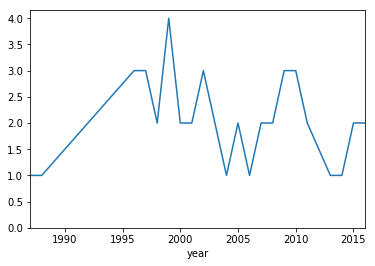

In [20]:
d.plot(ylim = 0) # note, we can add ylim = 0 to forece it to start at zero


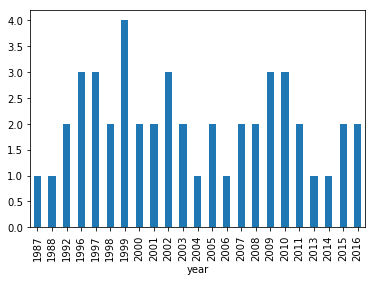

In [21]:
c.groupby(['year']).size().plot(kind = 'bar')

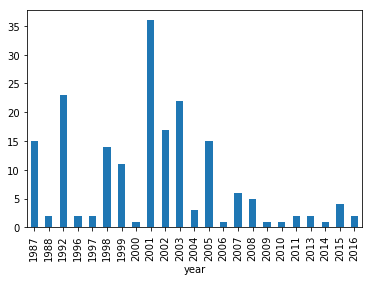

In [22]:
c.groupby(['year']).n.max().plot(kind = 'bar')


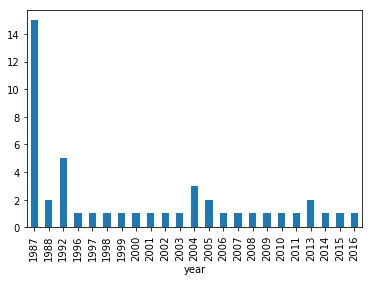

In [23]:
x = c.groupby(['year']).n.min().plot(kind = 'bar')


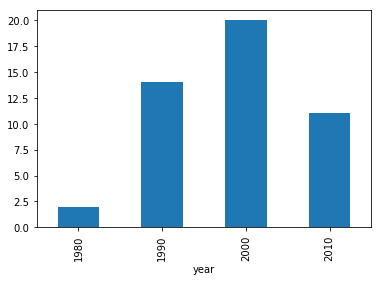

In [24]:
c.groupby(c.year // 10*10).n.size().plot(kind = 'bar')
# we can group by decade by putting in a manipulation inside groupby

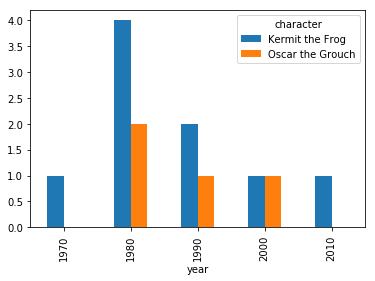

In [25]:
c = cast
c = c[(c.character == 'Kermit the Frog')|(c.character == 'Oscar the Grouch')]
c = c.groupby(['character', c.year//10*10]).n.size()
g = c
# unstack will choose one of the indices in the series outputed from above
c = c.unstack(['character'])
c.plot(kind = 'bar')


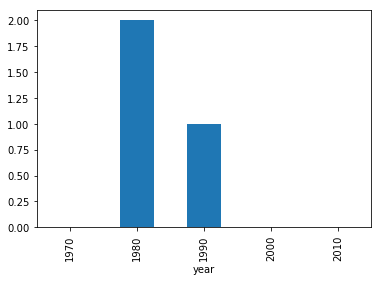

In [26]:
(c['Kermit the Frog'] - c['Oscar the Grouch']).plot(kind = 'bar')

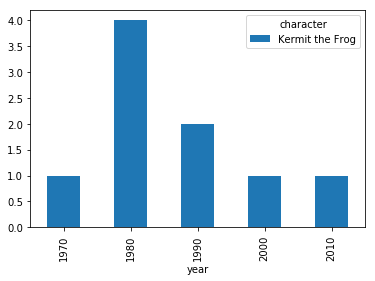

In [27]:
g.unstack().fillna(0) # we can choose to change how stacking works
g.unstack(0).fillna('').plot(kind = 'bar') # we can choose to change how stacking works
# we can also fill in misisng data with fillna


In [40]:
d = g.unstack(0)
d['extra'] = 1
d = d.set_index('extra', append = True)
d

,character,Kermit the Frog,Oscar the Grouch
year,extra,,
1970,1,1.0,NaN
1980,1,4.0,2.0
1990,1,2.0,1.0
2000,1,1.0,1.0
2010,1,1.0,NaN


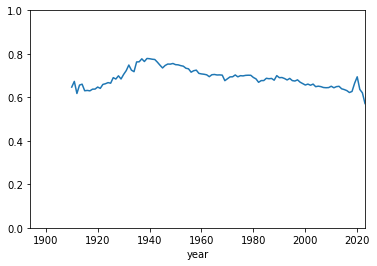

In [56]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type') # move type from index to column
c = (c.actor / (c.actor + c.actress))
c.plot(ylim = (0,1))


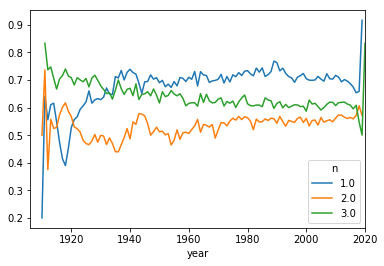

In [97]:
c = cast[cast.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
c = c.actor / (c.actor + c.actress)
c.unstack('n').plot()


In [98]:
c

year  n  
1906  1.0    0.666667
      2.0    0.666667
      3.0         NaN
1907  1.0         NaN
      2.0         NaN
      3.0         NaN
1908  1.0         NaN
      2.0         NaN
      3.0         NaN
1909  1.0         NaN
1910  1.0    0.200000
      2.0    0.500000
      3.0         NaN
1911  1.0    0.640000
      2.0    0.736842
      3.0    0.833333
1912  1.0    0.555556
      2.0    0.375000
      3.0    0.736842
1913  1.0    0.610687
      2.0    0.557522
      3.0    0.747475
1914  1.0    0.615804
      2.0    0.524390
      3.0    0.706452
1915  1.0    0.547904
      2.0    0.528302
      3.0    0.667221
1916  1.0    0.473520
      2.0    0.574074
               ...   
2011  1.0    0.710520
      2.0    0.573365
      3.0    0.617962
2012  1.0    0.693307
      2.0    0.572375
      3.0    0.618848
2013  1.0    0.701603
      2.0    0.565362
      3.0    0.620027
2014  1.0    0.695908
      2.0    0.560453
      3.0    0.612921
2015  1.0    0.686909
      2.0    0.564311
